<a href="https://colab.research.google.com/github/kushiraj18/DATA-ANALYSIS-USING-PYTHON/blob/main/2030_LAB_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv("/content/dermatology_database_1.csv")

In [3]:
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [4]:
data['age'] = pd.to_numeric(data['age'], errors='coerce')
data['age'].fillna(data['age'].median(), inplace=True)

print(data.isnull().sum())


erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

<ipython-input-4-ab0f3dcf4984>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)


In [5]:
X = data.drop(columns=['class'])
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [6]:
svm_model = SVC(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

svm_predictions = svm_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print(f"SVM Accuracy: {svm_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")


SVM Accuracy: 0.6909090909090909
Random Forest Accuracy: 0.9727272727272728


In [7]:
from scipy.stats import zscore

z_scores = np.abs(zscore(X))
outliers = np.where(z_scores > 3)
print(f"Outliers detected in rows: {set(outliers[0])}")

X_clean = X[(z_scores < 3).all(axis=1)]
y_clean = y[X_clean.index]

from collections import Counter
class_counts = Counter(y_clean)
for class_label, count in class_counts.items():
    if count < 2:
        print(f"Class {class_label} has only {count} sample(s) after outlier removal. Consider adjusting outlier removal or stratification strategy.")


try:
    X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
        X_clean, y_clean, test_size=0.3, random_state=42, stratify=y_clean
    )
except ValueError:
    print("Stratification failed due to a class with too few samples. Proceeding without stratification.")
    X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
        X_clean, y_clean, test_size=0.3, random_state=42
    )
svm_model.fit(X_train_clean, y_train_clean)
rf_model.fit(X_train_clean, y_train_clean)

svm_clean_predictions = svm_model.predict(X_test_clean)
rf_clean_predictions = rf_model.predict(X_test_clean)

svm_clean_accuracy = accuracy_score(y_test_clean, svm_clean_predictions)
rf_clean_accuracy = accuracy_score(y_test_clean, rf_clean_predictions)

print(f"SVM Accuracy after outlier removal: {svm_clean_accuracy}")
print(f"Random Forest Accuracy after outlier removal: {rf_clean_accuracy}")

Outliers detected in rows: {2, 3, 5, 6, 17, 18, 19, 20, 23, 26, 28, 29, 32, 44, 47, 53, 54, 66, 68, 71, 78, 81, 84, 86, 87, 88, 97, 99, 101, 104, 107, 109, 112, 113, 115, 117, 121, 122, 126, 127, 130, 132, 137, 138, 142, 143, 144, 145, 154, 163, 171, 172, 173, 175, 176, 178, 179, 180, 183, 184, 191, 194, 201, 203, 206, 207, 210, 213, 215, 216, 223, 227, 230, 231, 232, 236, 238, 239, 240, 263, 264, 266, 267, 268, 289, 295, 297, 298, 299, 304, 314, 326, 333, 339, 341, 343, 344, 347, 348, 349, 352, 353, 354, 355, 363, 364}
Class 6 has only 1 sample(s) after outlier removal. Consider adjusting outlier removal or stratification strategy.
Stratification failed due to a class with too few samples. Proceeding without stratification.
SVM Accuracy after outlier removal: 0.6025641025641025
Random Forest Accuracy after outlier removal: 0.9230769230769231


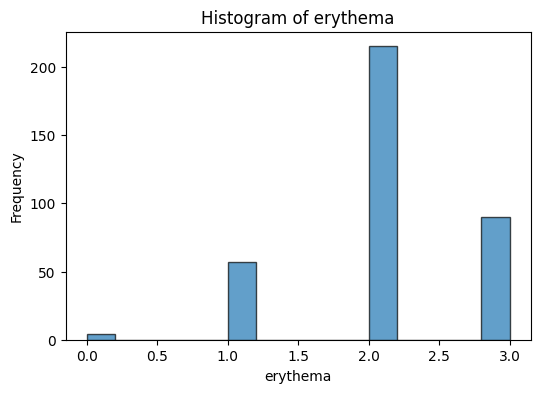

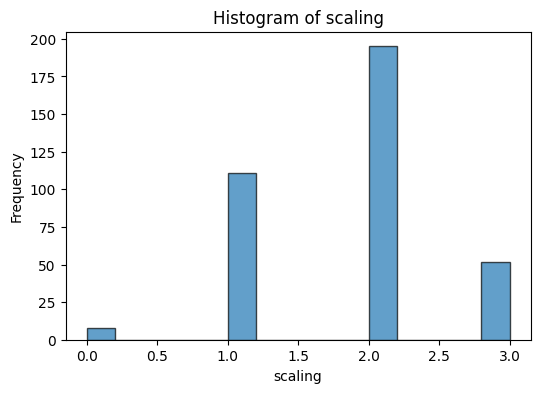

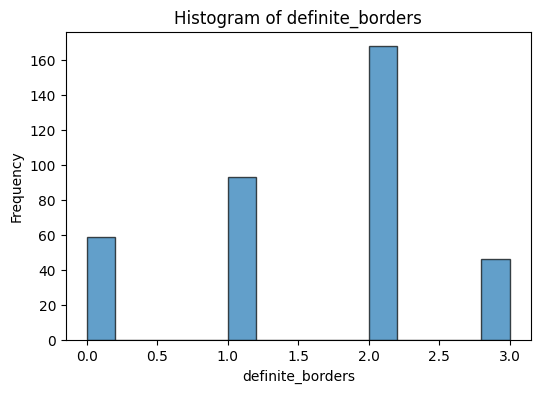

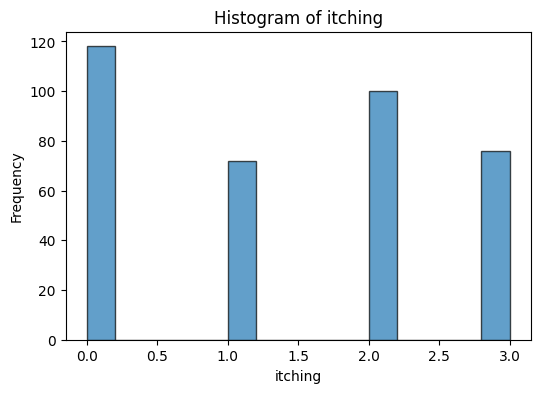

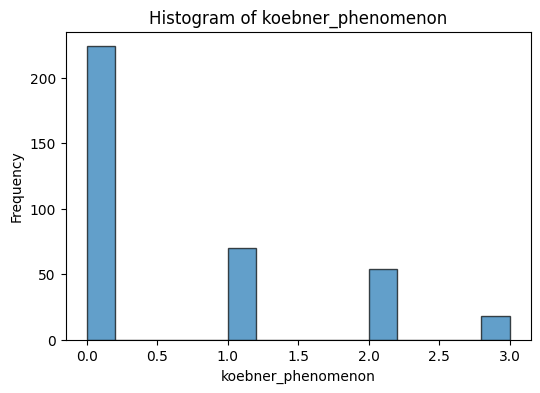

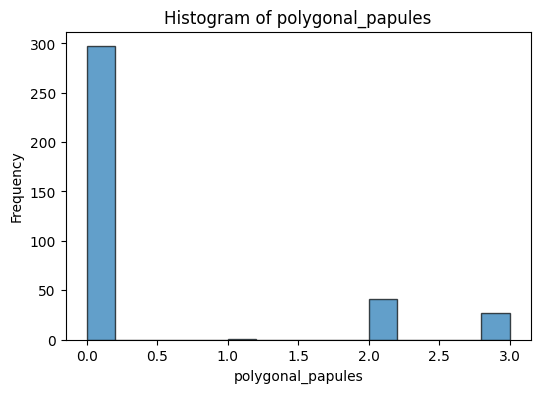

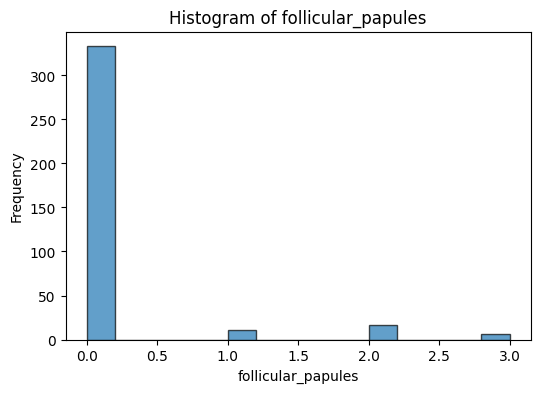

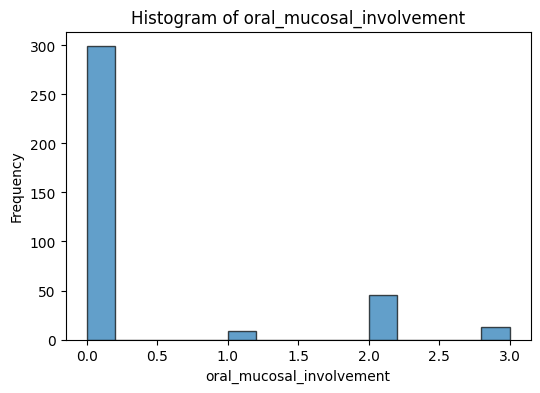

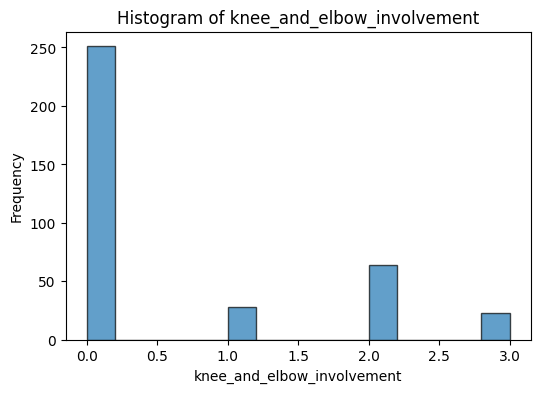

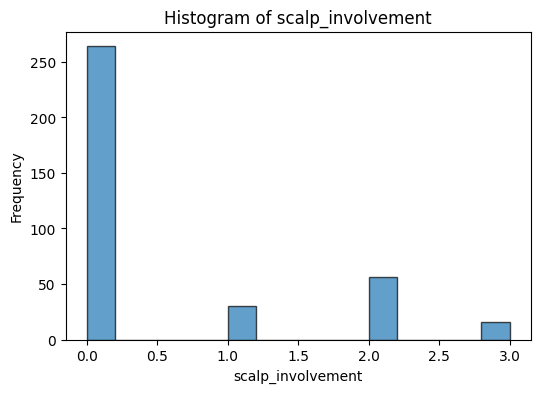

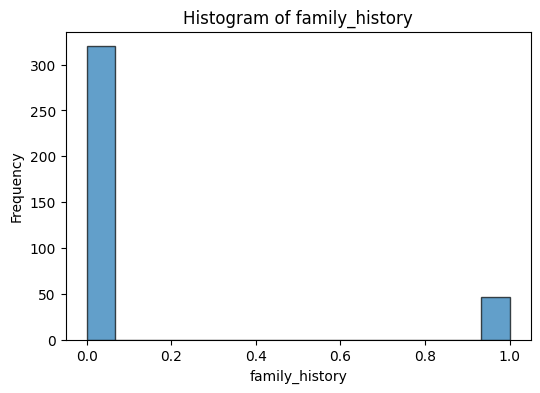

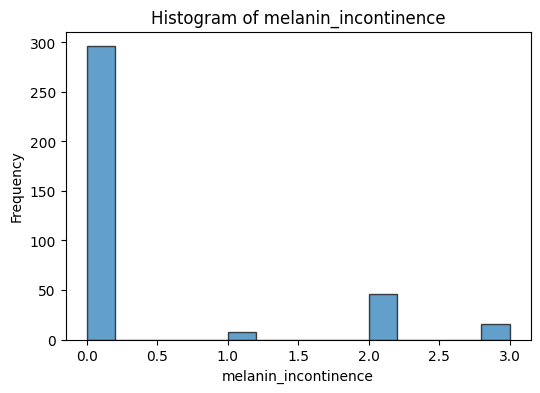

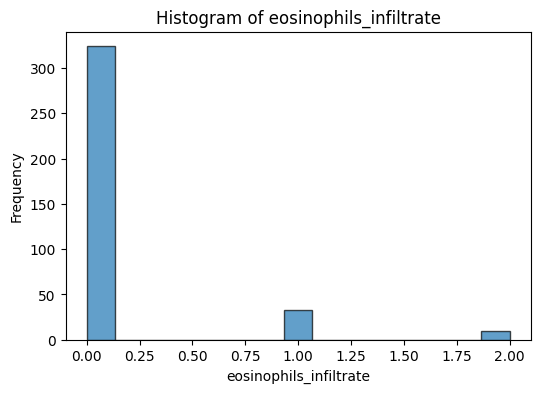

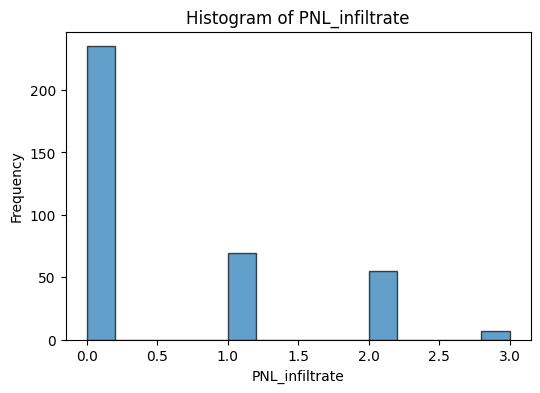

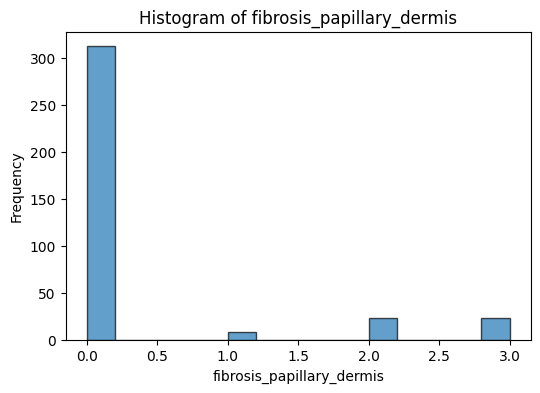

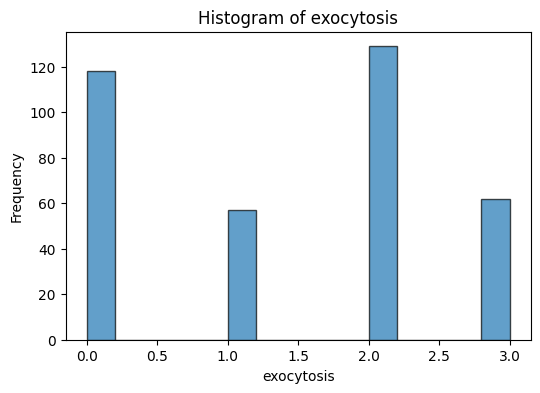

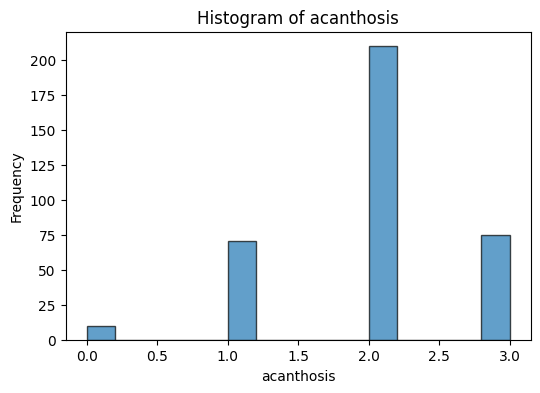

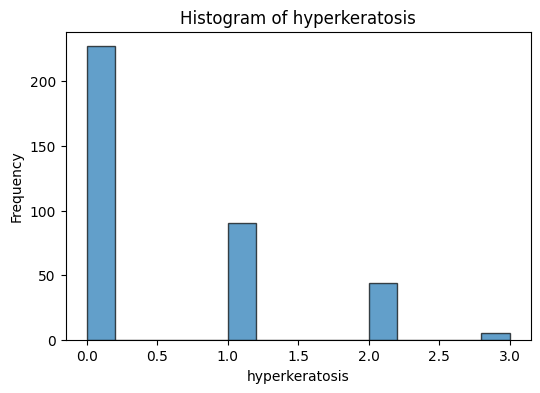

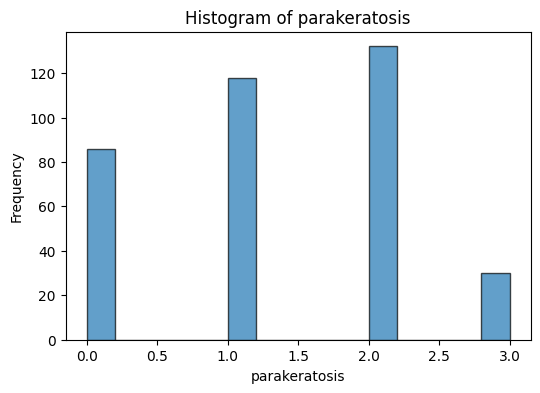

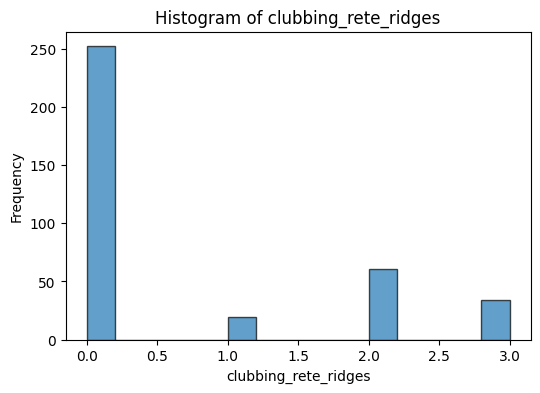

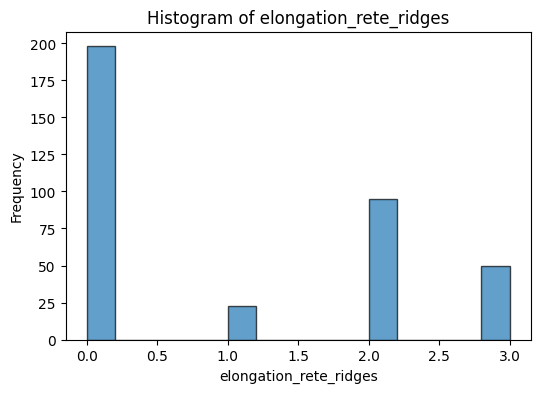

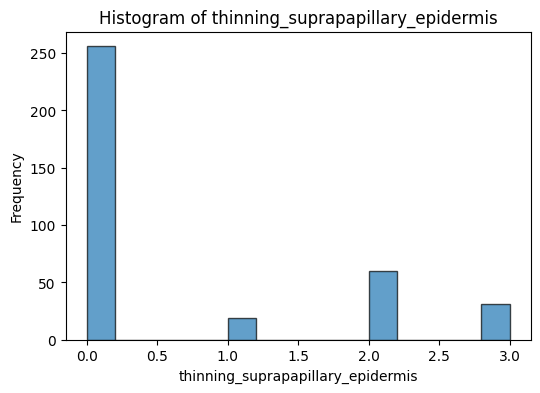

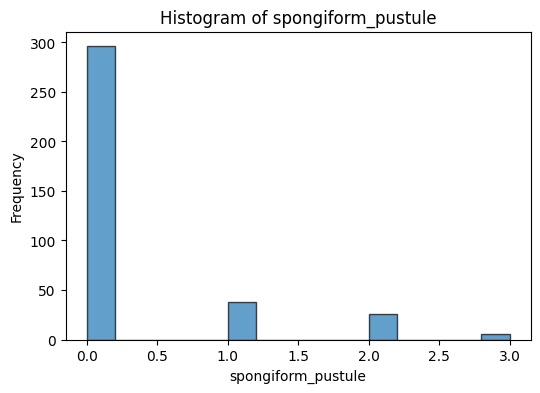

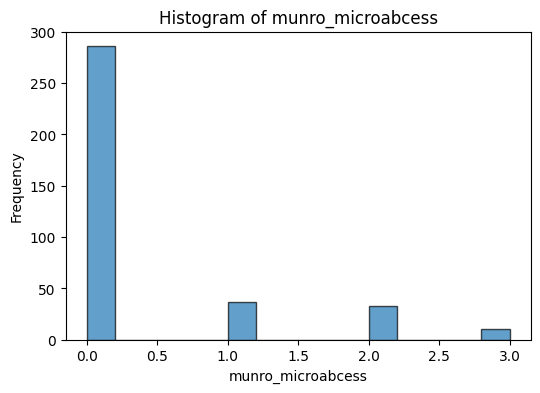

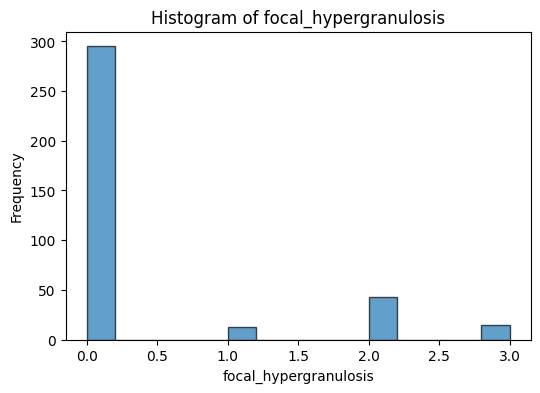

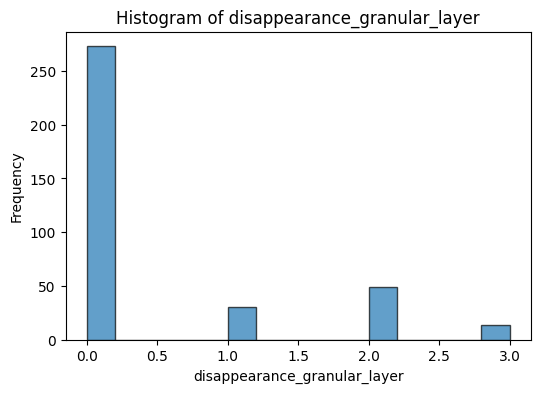

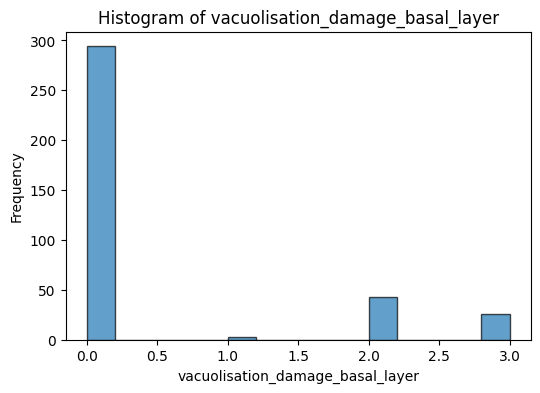

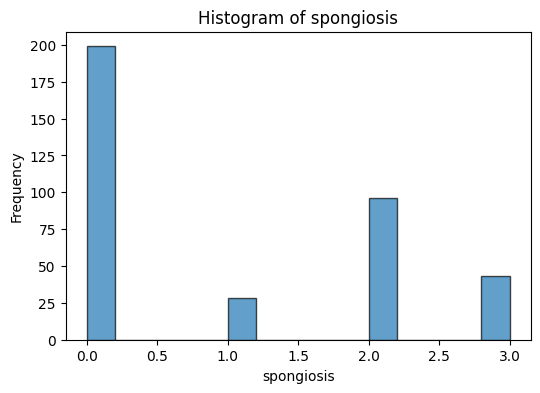

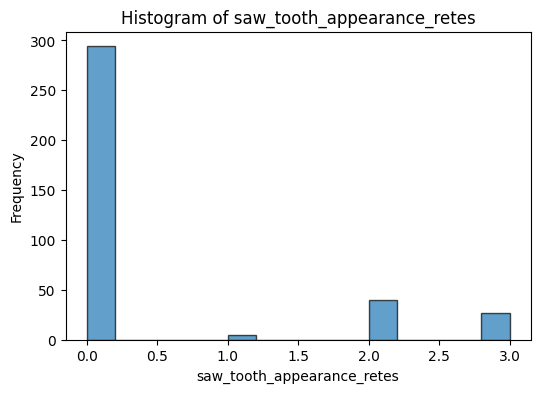

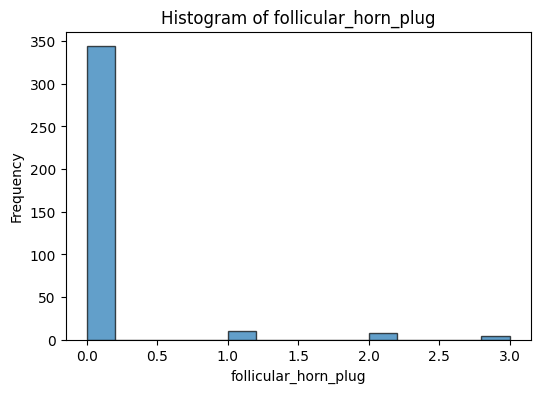

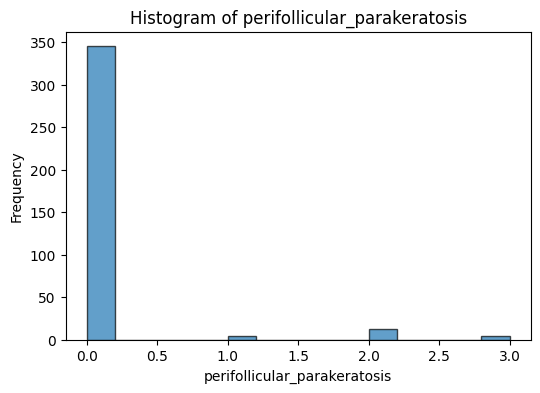

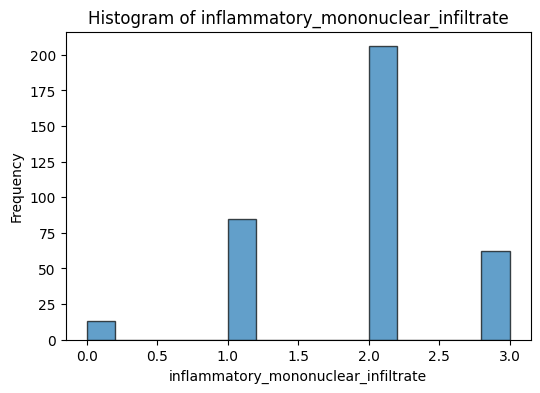

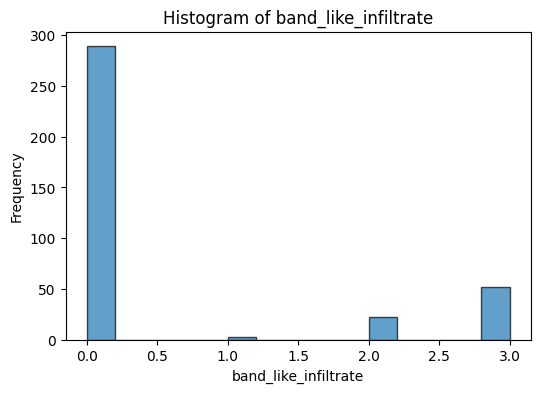

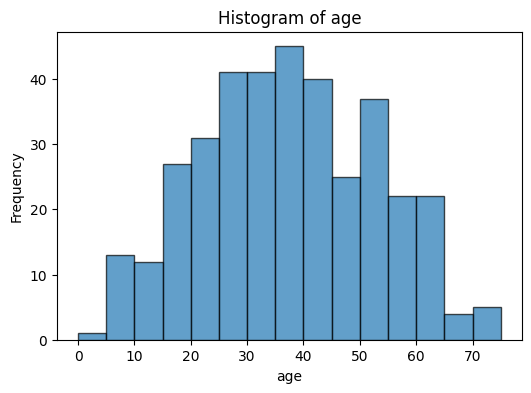

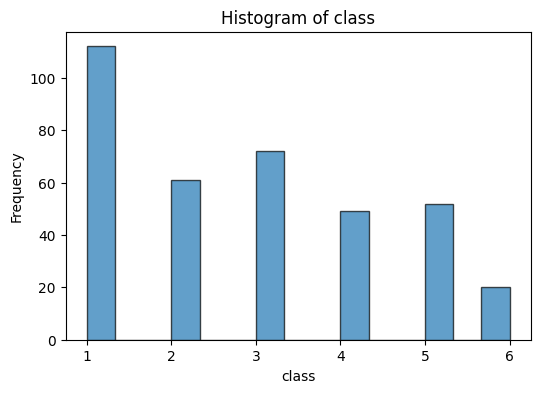

In [8]:
for column in data.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(data[column], bins=15, edgecolor='k', alpha=0.7)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()
